#### 동적 웹 페이지 크롤링 <hr>

- 동적 웹 페이지 크롤링 준비 : chromedriver 자동 다운로드 소스

In [17]:
from time import sleep
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://www.naver.com')
print(driver.current_url)

sleep(2)
driver.close()  # 하나의 탭만 종료
driver.quit()  # webdriver 전체 종료

https://www.naver.com/


https://www.google.com/
Google
<html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.sY-PcpVhgWw.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo9Rvk-uuNpxhdO70m878GpubWGzeQ/cb=gapi.loaded_0" nonce="" async=""></script><script nonce="">(function(){var _g={kEI:'663aZY6WF9TT2roPu-aB0A8',kEXPI:'31',kBL:'y2h-',kOPI:89978449};(function(){var a;(null==(a=window.google)?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn='webhp';google.kHL='ko';})();(function(){
var h=this||self;function l(){return void 0!==window.google&&void 0!==window.google.kOPI&&0!==window.google.kOPI?window.google.kOPI:null};var m,n=[];function p(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));
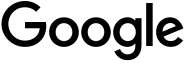

In [18]:
from selenium import webdriver

driver = webdriver.Chrome()

driver.get('https://www.google.com')

print(driver.current_url)
print(driver.title)
print(driver.page_source)

driver.implicitly_wait(time_to_wait = 5)
driver.close()
driver.quit()

In [19]:
import selenium
selenium.__version__

'3.141.0'

- Selenium API : element 접근 예제 #1

In [20]:
from selenium import webdriver
from selenium.webdriver.common.by import By

driver = webdriver.Chrome()

driver.get('http://www.pythonscraping.com/pages/warandpeace.html')
driver.implicitly_wait(5)

# find_element(By.CLASS_NAME, '클래스이름') : 하나의 클래스 이름 검색
name = driver.find_element(By.CLASS_NAME, 'green')
print(name.text)

print('-' * 20)

# find_elements(By.CLASS_NAME, '클래스이름') : 해당 클래스 이름을 모두 검색
nameList = driver.find_elements(By.CLASS_NAME, 'green')
for name in nameList:
    print(name.text)

driver.quit()

Anna Pavlovna Scherer
--------------------
Anna Pavlovna Scherer
Empress Marya Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince
the prince
Prince Vasili
Anna Pavlovna
Anna Pavlovna
the prince
Wintzingerode
King of Prussia
le Vicomte de Mortemart
Montmorencys
Rohans
Abbe Morio
the Emperor
the prince
Prince Vasili
Dowager Empress Marya Fedorovna
the baron
Anna Pavlovna
the Empress
the Empress
Anna Pavlovna's
Her Majesty
Baron Funke
The prince
Anna Pavlovna
the Empress
The prince
Anatole
the prince
The prince
Anna Pavlovna
Anna Pavlovna


- Selenium API : 텍스트 입력 예제 (네이버 로그인)

In [21]:
from selenium import webdriver
from selenium.webdriver.common.by import By

# User Agent 정보 추가
agent_option = webdriver.ChromeOptions()
user_agent_string = 'Mozilla/5.0'
agent_option.add_argument('user-agent=' + user_agent_string)

driver = webdriver.Chrome(options = agent_option)
driver.get('https://nid.naver.com/nidlogin.login')

driver.implicitly_wait(5)

# <input>의 이름이 id를 검색
driver.find_element(By.NAME, 'id').send_keys(' 아이디')
driver.find_element(By.NAME, 'pw').send_keys(' 비밀번호')

# //*[@id="log.login"]
# driver.find_element(By.XPATH,'//*[@id="log.login"]').click()
driver.find_element(By.ID, 'log.login').click()

driver.quit()

- Selenium API : 구글 검색어 입력 예제
    - submit()
        - form으로 구성된 요소의 경우 => 검색어 전달 후 submit() 함수 호출, 해당 요소 검색 후 click() 사용 가능
    - click()
        - 버튼의 경우 click() 사용

In [22]:
from selenium import webdriver
from selenium.webdriver.common.by import By

driver = webdriver.Chrome()
driver.get('https://google.com')

# driver.implicity_wait(3)

search_box = driver.find_element(By.NAME, 'q')
search_box.send_keys('Python')
search_box.submit()  # 검색 버튼 누름

- Selenium API : 구글 검색어 입력 및 검색 결과

In [23]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

driver = webdriver.Chrome()
driver.get('https://google.com')

# driver.implicity_wait(3)

search_box = driver.find_element(By.NAME, 'q')
search_box.send_keys('Python')
search_box.submit()  # 검색 버튼 누름

time.sleep(3)
search_results = driver.find_elements(By.CSS_SELECTOR, 'div.g')
print(len(search_results))

# Extract and print thetitle and URL of each search result
for result in search_results:
    title_element = result.find_element(By.CSS_SELECTOR, 'h3')
    title = title_element.text.strip()
    print(f'{title}')

driver.quit()

13
Welcome to Python.org
Welcome to Python.org
Python - 파이썬
파이썬 - 위키백과, 우리 모두의 백과사전
1. 파이썬 시작하기 - 왕초보를 위한 Python



01-4 파이썬 설치하기
Python란 무엇인가요? - Python 언어 설명
Python Tutorial
1 장 파이썬(Python) 입문 | 파이썬 프로그래밍 기초
이미지


- Selenium API : 프레임 이동
    - iframe( inline frame) 접근
        - iframe 현재 페이지에 다른 웹 페이지를 불러와서 삽입시킬 수 있음
            - iframe src = '삽입할페이지 주소/iframe 
    - frame, windows로 이동 함수
        - switch_to_frame('프레임 이름')
        - switch_to_window('윈도우 이름')

- Selenium API #4 : 프래임 이동 예제

In [24]:
from bs4 import BeautifulSoup
from selenium import webdriver

driver = webdriver.Chrome()  # 본인의 webdriver 경로
driver.get('https://blog.naver.com/swf1004/221631056531')

driver.switch_to.frame('mainFrame')  # 해당 iframe으로 이동

html = driver.page_source  # 전체 HTML 소스를 가져옴
soup = BeautifulSoup(html, 'html.parser')

whole_border = soup.find('div', {'id' : 'whole-border'})
results = whole_border.find_all('div', {'class': 'se-module'})

result1 = []
for result in results:
    print(result.text.replace('\n', ''))
    result1.append(result.text)

[해외복지이야기] 독일 저소득층 ‘주거비용 상승’에 따른 주거수당 증액 방안 
미국의 정치인이자 과학자였던 벤자민 프랭클린은 "오래 살기를 바라기 보다 잘 살기를 바라라."라고 했죠. 잘 산다는 건 그저 굶지않고 살아감을 넘어 평온하고 걱정없이 살아감을 이야기하는 것이겠죠? 그런데 최근 독일에서는 월급의 절반을 월세로 내야 할 만큼 살인적인 집값 상승으로 인해 많은 사람들의 걱정이 이어지고 있습니다. 그에 따라 집값 상승은 최근 독일의 중요한 사회문제입니다. 유럽연합 통계청 보고에 따르면 독일인의 절반가량은 월세를 내며 살고 있다고 해요. 이는 유럽연합 평균인 29.9%보다 높은 비율이며, 월세 거주자의 비율은 대도시가 더 높아요. 일간지 <빌트> 보도에 따르면 베를린 시민의 85%가 월세 생활을 하고 있고, 2008년에 비해 집세가 무려 80% 나 상승했답니다. 독일에서는 최근 몇 년간 일부 지역에서 집세가 급격하게 상승하게 되면서, 주거공급에 문제가 생기게 되었고 그로 인해 저소득층의 주거문제가 크게 대두하였죠. 자세한 주거문제에 대한 상황 확인해볼게요.

독일 ‘주거비용 상승’ 주거 수당증액방안집값상승으로 인한 주거위기
독일에서는 최근 몇 년간 일부 지역에서 집세가 급격하게 상승하게 되면서, 주거공급에 문제가 생기게 되었고 그로 인해 저소득층의 주거문제가 크게 대두되었죠. 조사에 따르면 대도시 거주자 중 상당수가 월세 상승으로 인해 원래 살던 지역을 떠난 것으로 확인했으며, 직장을 옮기게 되어 이사를 가야 함에도 불구하고 집값 때문에 계속 거주하는 가구도 상당수였습니다. 독일 대학생들 역시 가장 큰 경제적 스트레스는 집세 상승이에요. 독일경제연구소가 조사한 바로는 베를린 대학가 아파트의 임대료가 1년 전과 비교했을 때 무려 67.3%가 올랐고, 전국적으로 대학가 아파트 임대료가 빠르게 오르고 있다고 발표했답니다. 유로스타트(유럽연합 통계 기구)가 유럽 각국의 2015년 기준 주거비용을 산출한 통계에 따르면 저소득층의 주거비용이 다른 유럽 국가들과 비교하면

- 동적 웹페이지 크롤링 예제 코드 #1

In [25]:
# 커피빈 코리아 홈페이지 자동 실행
from bs4 import BeautifulSoup
from selenium import webdriver

driver = webdriver.Chrome()
driver.get('https://www.coffeebeankorea.com/store/store.asp')

In [26]:
# storePop2(1) 호출 - 팝업 창에 1번 매장인 '학동역 DT점' 나타남
driver.execute_script('storePop2(1)')  # 소스 보기에서도 매장정보가 보이지 않음

- 동적 웹페이지 크롤링 예제 코드 #2
    - 함수 호출 결과 페이지를 별도로 저장 후 BeautifulSoup과 연동
        - page_source : requests.get() 함수를 사용해서 가져온 text 내용과 동일, BeautifulSoup과 연동해서 필요한 정보를 크롤링

In [27]:
html = driver.page_source  # 해당 웹페이지의 소스가 저장됨
soup = BeautifulSoup(html, 'html.parser')

soup.prettify()  # HTML 소스를 보기 좋게 출력

'<html class=" js canvas canvastext no-touch geolocation postmessage indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderradius boxshadow textshadow opacity cssanimations cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg" lang="ko-KR" style="">\n <!--<![endif]-->\n <head>\n  <script async="" src="https://www.googletagmanager.com/gtag/js?id=G-84W93E2CP2&amp;cx=c&amp;_slc=1" type="text/javascript">\n  </script>\n  <script async="" src="https://www.googletagmanager.com/gtag/js?id=G-EKXL62KETE&amp;cx=c&amp;_slc=1" type="text/javascript">\n  </script>\n  <script async="" src="//www.google-analytics.com/analytics.js">\n  </script>\n  <script async="" src="https://www.google-analytics.com/plugins/ua/linkid.js" type="text/javascript">\n  </script>\n  <meta charset="utf-8">\n   <meta content="IE=edge, chrome=1" http-equi

- 예제 코드1 : #1

In [32]:
from bs4 import BeautifulSoup
from selenium import webdriver
import collections
collections.Callable = collections.abc.Callable

driver = webdriver.Chrome()
driver.get('http://www.coffeebeankorea.com/store/store.asp')
driver.execute_script('storePop2(1)')

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
#print(soup.prettify()) # html 소스를 보기 좋게 출력.

store_names = soup.select('div.store_txt > p.name > span')
store_name_list = []
for name in store_names :
    store_name_list.append(name.get_text())
print('매장 개수 : ', len(store_name_list))
print(store_name_list)
print('-'*50)

store_addresses = soup.select('p.addr > span')
store_address_list = []
for addr in store_addresses :
    print(addr.get_text())
    store_address_list.append(addr.get_text())

driver.quit()

매장 개수 :  252
['삼성봉은사거리점34m', '코엑스인터점262m', '삼성오크우드점418m', '삼성봉은사로점443m', '도심공항타워점495m', '트레이드타워점507m', '도심공항점560m', '파르나스몰점626m', '삼성로점631m', '삼성루첸타워점845m', '삼성역글라스타워뒷점908m', '포스코옆삼성로86길점977m', '청담성당점989m', '선릉KSA한국표준협회점1,113m', '테헤란로하이닉스뒷점1,226m', '선릉로93길점1,406m', '선릉로86길점1,465m', '선정릉역점1,507m', '선릉역3번출구세방빌딩점1,509m', '청담에스점1,573m', '청담카페점1,693m', '테헤란로비젼타워점1,804m', '영동고앞점1,892m', '하나은행경복궁역점10,130m', '서울대입구역점10,211m', '성남신흥점10,710m', '청주지웰시티점101,925m', '여의도신영증권별관점11,447m', '여의도34번지점11,470m', '여의도SK증권빌딩점11,577m', '현대자동차여의도점11,686m', '신촌점11,690m', 'IFC MALL 3호점11,901m', 'IFC MALL2호점11,901m', '여의도교보증권카페점11,901m', '여의도교보증권점11,902m', '여의도순복음교회옆점11,979m', '상수역점12,553m', '동교동삼거리점12,662m', '홍대역8번출구점12,715m', '홍대역점12,810m', '분당차병원점12,944m', '분당차병원본관앞점13,079m', '타임스퀘어점13,714m', '대전탄방동점132,900m', '강북구청앞점14,120m', '구로G-ValleyMall14,722m', '하남신세계백화점B1점14,915m', '디큐브시티점14,992m', '문래동점15,015m', '중계동은행사거리점15,227m', '분당플라자점15,411m', 'KB국민은행노원역점15,446m', '응암동점15,452m', '분당서현점15,511m', '마리오아울렛점15,749m', 

- 동적 웹페이지 크롤링 예제 코드 #1

In [37]:
# 왜 빈 데이터프레임이 반환될까?
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import time
def coffeebean_store(store_list):
    coffeebean_url='https://www.coffeebeankorea.com/store/store.asp'
    driver = webdriver.Chrome()

    for i in range(1, 388):
        driver.get(coffeebean_url)
        time.sleep(1)

        driver.execute_script('storePop2(%d)'%i)
        time.sleep(1)

        try:
            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')
            store_name = soup.select_one('div.store_txt>h2').text
            store_info = soup.select('div.store_txt>table.store_table>tbody>tr>td')
            store_address_list = list(store_info[2])
            store_addr = store_address_list[0]
            store_phone = store_info[3].text
            print('{} {} {}'.format(i+1, store_name, store_addr, store_phone))
            store_list.append([store_name, store_addr, store_phone])
        except :
            continue

def main() :
    store_info =[]
    coffeebean_store(store_info)
    coffeebean_table = pd.DataFrame(store_info, columns = ('매장이름', '주소', '전화번호'))
    print(coffeebean_table.head())

    coffeebean_table.to_csv('coffeebean_branches.csv', encoding='utf-8', mode='w', index=True)

main()

Empty DataFrame
Columns: [매장이름, 주소, 전화번호]
Index: []
